In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * time_duration)
    event_times = np.sort(np.random.uniform(0, time_duration, num_events))
    inter_arrival_times = np.diff(event_times)
    return num_events, event_times, inter_arrival_times

def plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
def poisson_simulation(rate, time_duration, show_visualization=True):
    if isinstance(rate, int):
        num_events, event_times, inter_arrival_times = generate_poisson_events(rate, time_duration)
        
        if show_visualization:
            plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration)
        else:
            return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):
        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        for individual_rate in rate:
            num_events, event_times, inter_arrival_times = generate_poisson_events(individual_rate, time_duration)
            num_events_list.append(num_events)
            event_times_list.append(event_times)
            inter_arrival_times_list.append(inter_arrival_times)

        if show_visualization:
            plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration)
        else:
            return num_events_list, event_times_list, inter_arrival_times_list

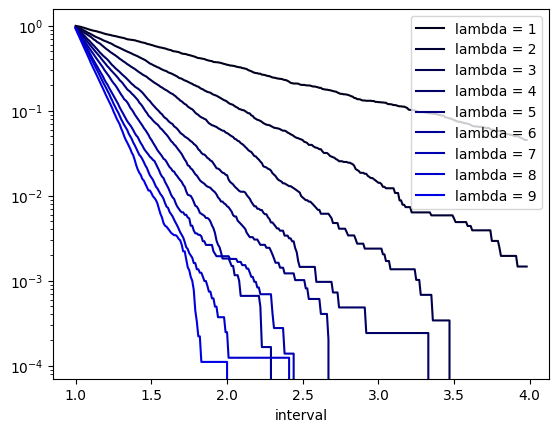

In [ ]:
import matplotlib.pyplot as plt
for k in range(1,10):
    num_events, event_times, inter_arrival_times = poisson_simulation(rate=k, time_duration=1000, show_visualization=False) # For single lambda rate (non-sequential)
    data = inter_arrival_times
    
    bins = [i*0.01 for i in range(300)]
    bins_plot = np.add(bins,1)
    hist,_ = np.histogram(data, bins=bins)
    hist = 1- np.cumsum(hist)/len(data)
    
    plt.plot(bins_plot[:-1],hist, linestyle='-',c=(0,0,k/10),label=f"lambda = {k}")
plt.legend()
plt.xlabel('interval')
plt.yscale('log')
plt.show()
# poisson_simulation(rate=[2, 4, 6, 10], time_duration=10) # For multiple lambda rate (sequential)

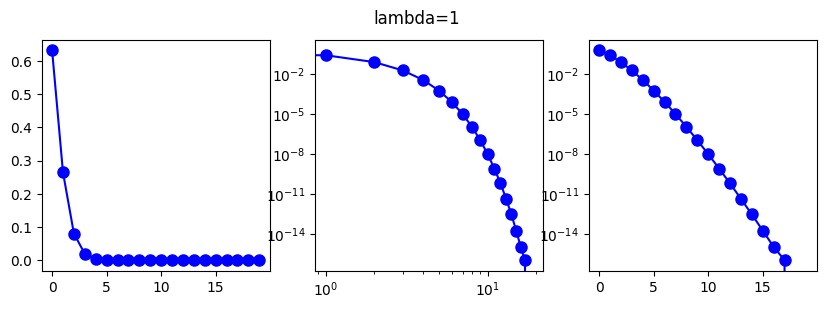

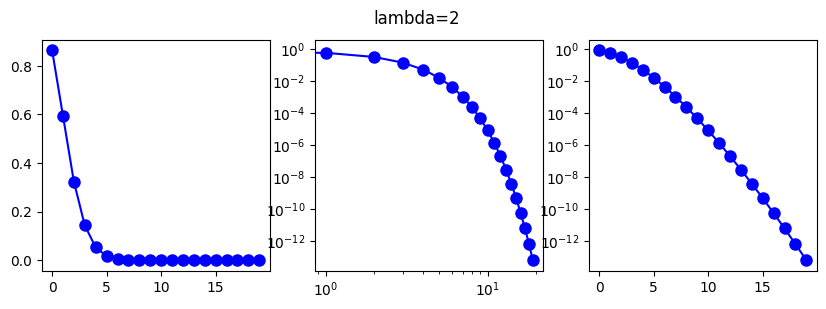

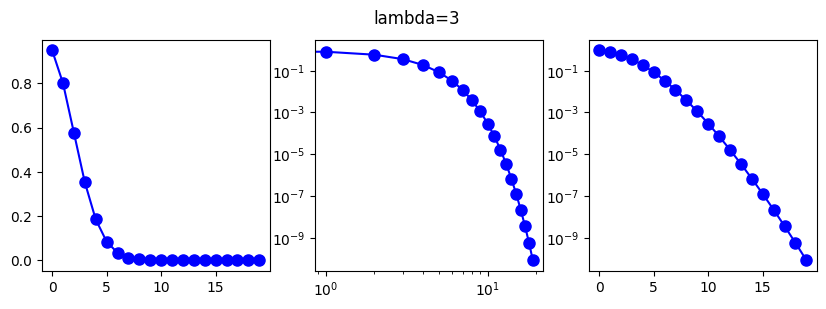

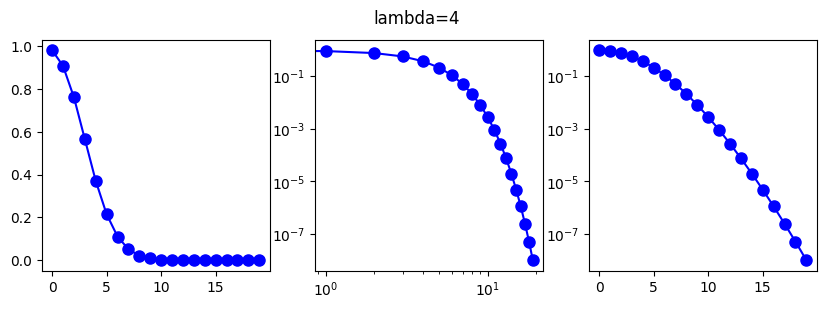

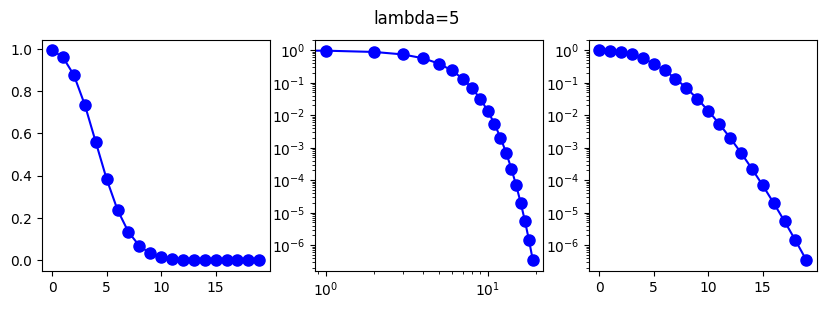

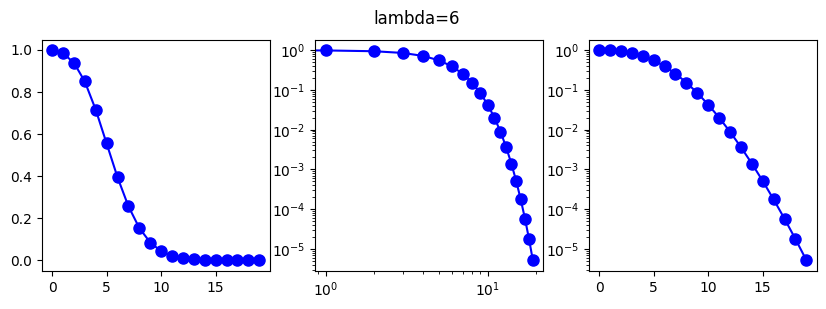

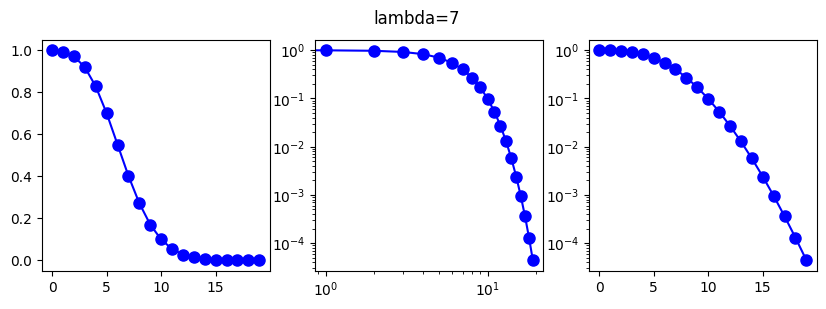

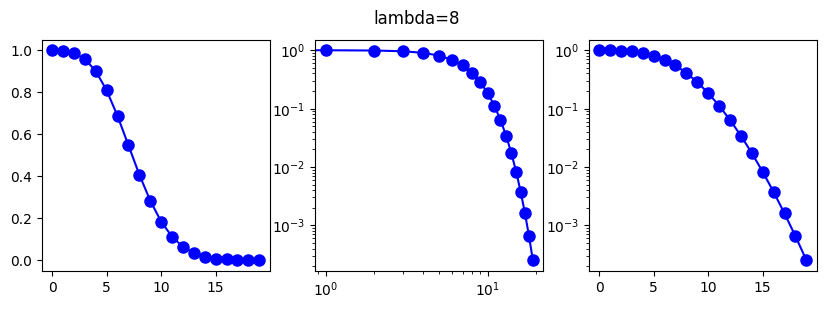

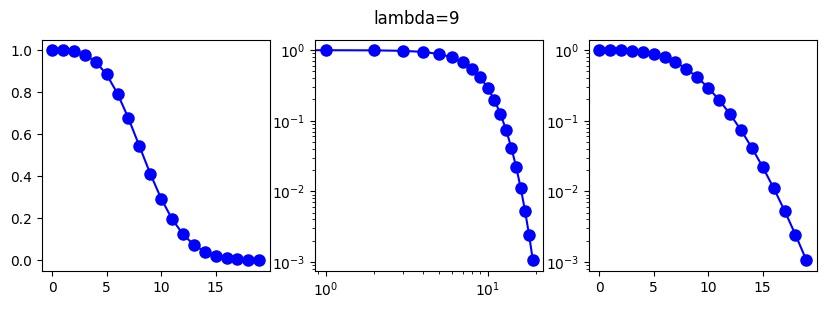

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

for mu in range(1,10):
    fig, ax = plt.subplots(1, 3, figsize=(10,3))
    fig.suptitle(f'lambda={mu}')
    x = np.arange(0,20)
    ax[0].plot(x, 1 - poisson.cdf(x, mu), linestyle='-',c='blue', label='poisson ccdf')
    ax[0].plot(x, 1 - poisson.cdf(x, mu),'bo', ms=8)
    
    ax[1].plot(x, 1 - poisson.cdf(x, mu), linestyle='-',c='blue', label='poisson ccdf')
    ax[1].plot(x, 1 - poisson.cdf(x, mu),'bo', ms=8)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    
    ax[2].plot(x, 1 - poisson.cdf(x, mu), linestyle='-',c='blue', label='poisson ccdf')
    ax[2].plot(x, 1 - poisson.cdf(x, mu),'bo', ms=8)
    ax[2].set_yscale('log')